# Uncapacitated facility location

The uncapacitated facility location problem (UFLP) calls for locating an undetermined number of facilities to minimize the sum of the fixed setup costs and the variable costs of serving the customers demand from the selected facilities. 

## Data

* A set $N =\{1, \ldots, n\}$ of potential depots
* A set $M =\{1, \ldots, m\}$ of clients
* A cost $f_j$ of opening a facility $j$
* A cost $c_{ij}$ associated with serving customer $i$ from facility $j$



In [105]:
import gurobipy as gb 
import random
import matplotlib.pyplot as plt

In [159]:
random.seed(10)


Facilities = ["LAquila", 
              "Avezzano", 
              "Pescara", 
              "Teramo", 
              "Chieti", 
              "Sulmona"]

OpeningCosts = [1500, 1200, 250, 100, 200, 20]

Plants = dict(zip(Facilities, OpeningCosts))



In [160]:
import string

Clients = list(string.ascii_lowercase)[:5]

In [161]:
Clients

['a', 'b', 'c', 'd', 'e']

In [162]:
Costs = {(i,j):random.randint(10,200) for i in Clients for j in Facilities }

In [163]:
Costs

{('a', 'LAquila'): 156,
 ('a', 'Avezzano'): 18,
 ('a', 'Pescara'): 119,
 ('a', 'Teramo'): 133,
 ('a', 'Chieti'): 157,
 ('a', 'Sulmona'): 13,
 ('b', 'LAquila'): 62,
 ('b', 'Avezzano'): 128,
 ('b', 'Pescara'): 135,
 ('b', 'Teramo'): 81,
 ('b', 'Chieti'): 177,
 ('b', 'Sulmona'): 51,
 ('c', 'LAquila'): 18,
 ('c', 'Avezzano'): 143,
 ('c', 'Pescara'): 135,
 ('c', 'Teramo'): 93,
 ('c', 'Chieti'): 29,
 ('c', 'Sulmona'): 73,
 ('d', 'LAquila'): 200,
 ('d', 'Avezzano'): 102,
 ('d', 'Pescara'): 21,
 ('d', 'Teramo'): 117,
 ('d', 'Chieti'): 45,
 ('d', 'Sulmona'): 164,
 ('e', 'LAquila'): 100,
 ('e', 'Avezzano'): 107,
 ('e', 'Pescara'): 117,
 ('e', 'Teramo'): 82,
 ('e', 'Chieti'): 182,
 ('e', 'Sulmona'): 77}

## Variables

$$
y_{j}=
\begin{cases}
1 \text{ if facility } j \text{ is open},\\
0 \text{ otherwise}
\end{cases}
$$

$$
x_{ij}=
\begin{cases}
1 \text{ if client } i \text{ is served from facility} j,\\
0 \text{ otherwise}
\end{cases}
$$

In [164]:
ufl = gb.Model('FacilityLocation')

In [165]:
y = ufl.addVars (Facilities, vtype=gb.GRB.BINARY, name='y')

In [166]:
x = ufl.addVars (Clients, Facilities, vtype=gb.GRB.CONTINUOUS, name = 'x')


In [167]:
ufl.update ()

ufl.write('ufl.lp')

## Objective function

$$
\min \sum_{j=1}^n f_j y_j + \sum_{i=1}^m \sum_{j=1}^n c_{ij}x_{ij}
$$


In [168]:
Costs

{('a', 'LAquila'): 156,
 ('a', 'Avezzano'): 18,
 ('a', 'Pescara'): 119,
 ('a', 'Teramo'): 133,
 ('a', 'Chieti'): 157,
 ('a', 'Sulmona'): 13,
 ('b', 'LAquila'): 62,
 ('b', 'Avezzano'): 128,
 ('b', 'Pescara'): 135,
 ('b', 'Teramo'): 81,
 ('b', 'Chieti'): 177,
 ('b', 'Sulmona'): 51,
 ('c', 'LAquila'): 18,
 ('c', 'Avezzano'): 143,
 ('c', 'Pescara'): 135,
 ('c', 'Teramo'): 93,
 ('c', 'Chieti'): 29,
 ('c', 'Sulmona'): 73,
 ('d', 'LAquila'): 200,
 ('d', 'Avezzano'): 102,
 ('d', 'Pescara'): 21,
 ('d', 'Teramo'): 117,
 ('d', 'Chieti'): 45,
 ('d', 'Sulmona'): 164,
 ('e', 'LAquila'): 100,
 ('e', 'Avezzano'): 107,
 ('e', 'Pescara'): 117,
 ('e', 'Teramo'): 82,
 ('e', 'Chieti'): 182,
 ('e', 'Sulmona'): 77}

In [169]:
x

{('a', 'LAquila'): <gurobi.Var x[a,LAquila]>,
 ('a', 'Avezzano'): <gurobi.Var x[a,Avezzano]>,
 ('a', 'Pescara'): <gurobi.Var x[a,Pescara]>,
 ('a', 'Teramo'): <gurobi.Var x[a,Teramo]>,
 ('a', 'Chieti'): <gurobi.Var x[a,Chieti]>,
 ('a', 'Sulmona'): <gurobi.Var x[a,Sulmona]>,
 ('b', 'LAquila'): <gurobi.Var x[b,LAquila]>,
 ('b', 'Avezzano'): <gurobi.Var x[b,Avezzano]>,
 ('b', 'Pescara'): <gurobi.Var x[b,Pescara]>,
 ('b', 'Teramo'): <gurobi.Var x[b,Teramo]>,
 ('b', 'Chieti'): <gurobi.Var x[b,Chieti]>,
 ('b', 'Sulmona'): <gurobi.Var x[b,Sulmona]>,
 ('c', 'LAquila'): <gurobi.Var x[c,LAquila]>,
 ('c', 'Avezzano'): <gurobi.Var x[c,Avezzano]>,
 ('c', 'Pescara'): <gurobi.Var x[c,Pescara]>,
 ('c', 'Teramo'): <gurobi.Var x[c,Teramo]>,
 ('c', 'Chieti'): <gurobi.Var x[c,Chieti]>,
 ('c', 'Sulmona'): <gurobi.Var x[c,Sulmona]>,
 ('d', 'LAquila'): <gurobi.Var x[d,LAquila]>,
 ('d', 'Avezzano'): <gurobi.Var x[d,Avezzano]>,
 ('d', 'Pescara'): <gurobi.Var x[d,Pescara]>,
 ('d', 'Teramo'): <gurobi.Var x[d,Tera

In [170]:
x.prod(Costs)

<gurobi.LinExpr: 156.0 x[a,LAquila] + 18.0 x[a,Avezzano] + 119.0 x[a,Pescara] + 133.0 x[a,Teramo] + 157.0 x[a,Chieti] + 13.0 x[a,Sulmona] + 62.0 x[b,LAquila] + 128.0 x[b,Avezzano] + 135.0 x[b,Pescara] + 81.0 x[b,Teramo] + 177.0 x[b,Chieti] + 51.0 x[b,Sulmona] + 18.0 x[c,LAquila] + 143.0 x[c,Avezzano] + 135.0 x[c,Pescara] + 93.0 x[c,Teramo] + 29.0 x[c,Chieti] + 73.0 x[c,Sulmona] + 200.0 x[d,LAquila] + 102.0 x[d,Avezzano] + 21.0 x[d,Pescara] + 117.0 x[d,Teramo] + 45.0 x[d,Chieti] + 164.0 x[d,Sulmona] + 100.0 x[e,LAquila] + 107.0 x[e,Avezzano] + 117.0 x[e,Pescara] + 82.0 x[e,Teramo] + 182.0 x[e,Chieti] + 77.0 x[e,Sulmona]>

In [171]:
ufl.setObjective(y.prod(Plants) + x.prod(Costs), gb.GRB.MINIMIZE)

ufl.write('ufl.lp')


## Constraints 

Demand of client $i$ must be satisfied

$$
\sum_{j=1}^n x_{ij} = 1 \text{ for } i=1,\ldots,m 
$$

A client can be served from facility $j$ only if facility $j$ is open:

$$
x_{ij} \le y_j \;\; \forall i,j
$$

In [173]:
ufl.addConstrs((x.sum(i,'*') == 1 for i in Clients), name='Dem')

ufl.update()

ufl.write('ufl.lp')

In [174]:
ufl.addConstrs((x[(i,j)] <= y[j] for i in Clients for j in Facilities), name = 'VUB')

ufl.update()

ufl.write('ufl.lp')

In [175]:
ufl.optimize()

Optimize a model with 40 rows, 36 columns and 120 nonzeros
Variable types: 30 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 5 rows and 0 columns
Presolve time: 0.00s
Presolved: 35 rows, 36 columns, 90 nonzeros
Variable types: 30 continuous, 6 integer (6 binary)

Root relaxation: objective 3.980000e+02, 9 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     398.0000000  398.00000  0.00%     -    0s

Explored 0 nodes (9 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 1: 398 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.980000000000e+02, best bound 3.980000000000e+02, gap 0.0000%


In [176]:
print('Obj: %g' % ufl.objVal)

print ()

for v in ufl.getVars():
    if v.x > 0.1:
        print ('%s=%g' % (v.varName, v.x), end = ' ')
    
    

Obj: 398

y[Sulmona]=1 x[a,Sulmona]=1 x[b,Sulmona]=1 x[c,Sulmona]=1 x[d,Sulmona]=1 x[e,Sulmona]=1 

In [177]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(Clients)
G.add_nodes_from(Facilities)

for u in Clients:
    for v in Facilities:
        G.add_edge(u,v)
        

{'a': 'a', 'b': 'b', 'c': 'c', 'd': 'd', 'e': 'e', 'LAquila': 'LAquila', 'Avezzano': 'Avezzano', 'Pescara': 'Pescara', 'Teramo': 'Teramo', 'Chieti': 'Chieti', 'Sulmona': 'Sulmona'}


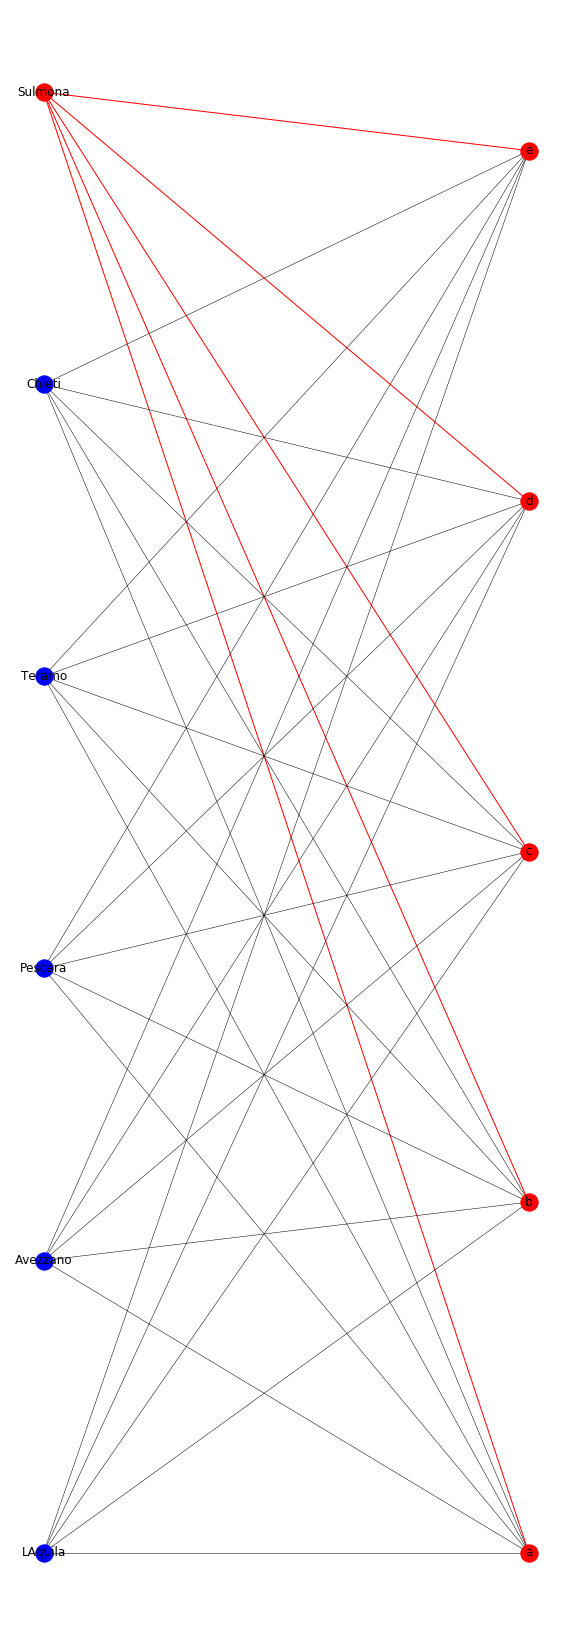

In [178]:
%matplotlib inline


plt.figure(figsize=(10,30))

pos = {}

for ind,u in enumerate(Facilities):
    pos[u] = (0.0, 30.0/len(Facilities) * ind)

for ind,u in enumerate(Clients):
    pos[u] = (20.0, 30.0/len(Clients) * ind)
    
    

activated_edge = [(i,j) for i,j in G.edges() if x[i,j].x > 1E-6]
not_activated_edge = [(i,j) for i,j in G.edges() if x[i,j].x <= 1E-6]

nx.draw_networkx_edges (G, pos, edgelist=activated_edge, edge_color='r')
nx.draw_networkx_edges (G, pos, edgelist=not_activated_edge, edge_color='black', width=0.5)
#nx.draw_networkx_edge_labels (G, pos, edge_labels=Costs)

nodelab = {i:i for i in G.nodes()}

print(nodelab)

active_plants = [j for j in Facilities if y[j].x > 0.5]
not_active_plants = [j for j in Facilities if y[j].x < 0.5]

nx.draw_networkx_nodes(G,pos,with_labels=True, nodelist = active_plants, node_color ='r')
nx.draw_networkx_nodes(G, pos,with_labels=True, nodelist = not_active_plants, node_color ='b')
nx.draw_networkx_nodes(G, pos,with_labels=True, nodelist = [u for u in Clients], node_color ='r')

nx.draw_networkx_labels (G,pos, labels=nodelab)

nx.draw(G, pos, with_labels=True,  alpha=0.0, node_color ='b', node_size=500, nodelabels=nodelab)
